In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import skimage.io

In [2]:
import copy
import io
import requests

from typing import List, Tuple, Union

# Load dataframe

In [3]:
def load_df(path) -> pd.DataFrame:
    """
        Load dataframe from URL or local path
    """
    if path.startswith("http"):
        s = requests.get(path).content
        path = io.StringIO(s.decode('utf-8'))
    return pd.read_csv(path)


# Load image

In [4]:
def load_image(path) -> np.ndarray:
    """
        Load image from URL or local path
    """
    return skimage.io.imread(path)

# Draw boxes

In [5]:
def draw_bboxes(
    img: np.ndarray,
    bboxes: Union[List[Tuple[int, int, int, int]], List[int]],
    linewidth=5,
    color: Tuple[int, int, int] = (0, 0, 255),
) -> np.ndarray:
    """
        Draw rectangle in the image from the list of bboxes.
    """
    canvas = img.copy()
    bboxes = copy.deepcopy(bboxes)
    for bbox in bboxes:
        if not isinstance(bbox, tuple):
            bbox = tuple(bbox)
        canvas = cv2.rectangle(
            canvas, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color, linewidth
        )
    return canvas

# Show image

In [6]:
def show_image(img: np.ndarray, size=(20, 15)) -> None:
    """
        This plots the input image through matplotlib plot api.
    """
    plt.figure(figsize=size)
    if img.ndim == 2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
COLORS = [
    (0, 0, 255),
    (255, 0, 0),
    (0, 255, 0),
    (255, 0, 255),
    (128, 255, 0),
    (0, 33, 255),
]

In [11]:
CSV_PATH = "https://raw.githubusercontent.com/docsumo/docudata/dev/samples/data_1.csv"
IMG_PATH = "https://raw.githubusercontent.com/docsumo/docudata/dev/samples/data_1.jpg"

In [12]:
DF = load_df(CSV_PATH)
IMG = load_image(IMG_PATH)

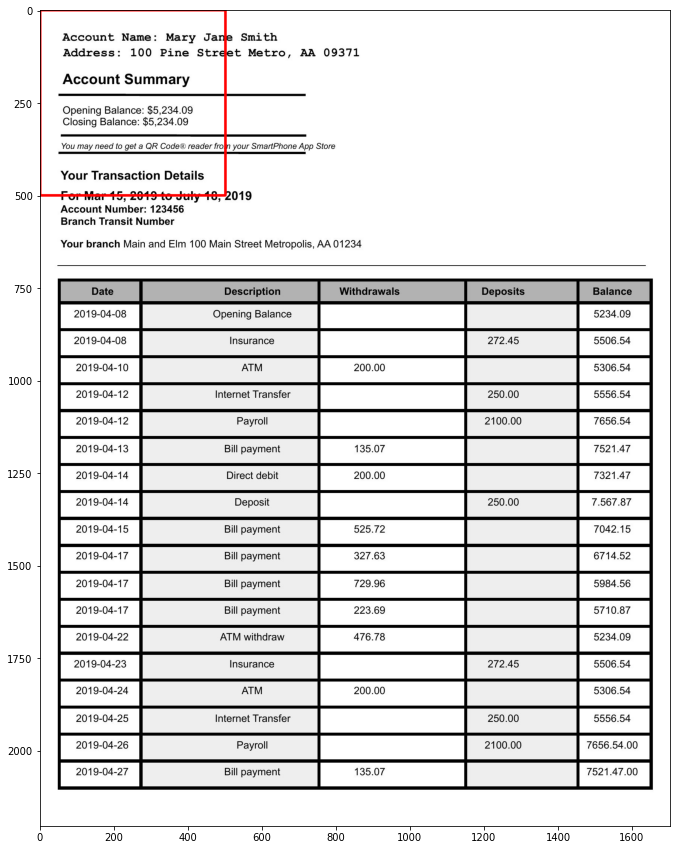

In [13]:
canvas = draw_bboxes(IMG, bboxes=[(0, 0, 500, 500)])
show_image(canvas)

In [15]:
DF.head()

,index_sort,page,block,line,x0,y0,x2,y2,Text,space_type,confidence
0,0,0,0,0,60,58,200,91,Account,1,0.995714
1,1,0,0,0,221,58,297,91,Name,2,0.995000
2,2,0,0,0,309,58,314,91,:,1,0.940000
3,3,0,0,0,341,58,419,91,Mary,1,0.925000
4,4,0,0,0,443,58,518,91,Jane,1,0.997500


# Text Manipulation

In [17]:
DF.loc[DF["Text"] == "Account"]

,index_sort,page,block,line,x0,y0,x2,y2,Text,space_type,confidence
0,0,0,0,0,60,58,200,91,Account,1,0.995714
14,15,0,1,0,61,163,215,205,Account,1,0.997143
49,54,0,5,1,56,525,165,548,Account,1,0.994286


In [23]:
import regex as re

# date = ("2019-04-01", "xyz", "p")

# pat = "\d\d\d\d-\d\d-\d\d"
pat = "[0-9]{4}.[0-9]{2}.[0-9]{2}"

for i, d in DF.iterrows():
    if re.match(pat, d["Text"]):
        print(d["Text"])


2019-04-08
2019-04-08
2019-04-10
2019-04-12
2019-04-12
2019-04-13
2019-04-14
2019-04-14
2019-04-15
2019-04-17
2019-04-17
2019-04-17
2019-04-22
2019-04-23
2019-04-24
2019-04-25
2019-04-26
7656.54.00
2019-04-27
7521.47.00
